In [1]:
pip install langchain langgraph google-generativeai pydantic IPython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U langgraph

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from IPython.display import Image, display
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END

from state_scope import AgentInputState, AgentState
from research_agent_scope import clarify_with_user, write_research_brief


In [6]:
deep_researcher_builder = StateGraph(AgentState, input_schema=AgentInputState)

# Add workflow nodes
deep_researcher_builder.add_node("clarify_with_user", clarify_with_user)
deep_researcher_builder.add_node("write_research_brief", write_research_brief)

# Add edges (workflow order)
deep_researcher_builder.add_edge(START, "clarify_with_user")
deep_researcher_builder.add_edge("write_research_brief", END)

# Compile the workflow
scope_research = deep_researcher_builder.compile()
print("✅ Workflow compiled successfully!")


✅ Workflow compiled successfully!


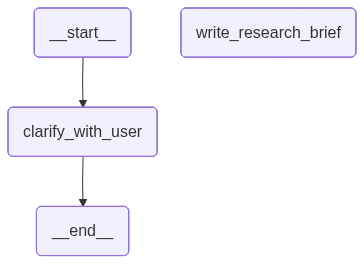

In [7]:
from langgraph.checkpoint.memory import InMemorySaver
checkpointer = InMemorySaver()
scope = deep_researcher_builder.compile(checkpointer=checkpointer)

display(Image(scope.get_graph(xray=True).draw_mermaid_png()))


In [8]:
result = scope_research.invoke({
    "messages": [HumanMessage(content="I want to research the best coffee shops in San Francisco.")]
})
print(result)


{'messages': [HumanMessage(content='I want to research the best coffee shops in San Francisco.', additional_kwargs={}, response_metadata={}, id='c84835db-71dd-487d-8057-4e1b82625c3e'), AIMessage(content='I will research the best coffee shops in San Francisco.', additional_kwargs={}, response_metadata={}, id='6bdce52c-fed6-42fb-9882-a435cc3ab9ce')], 'research_brief': 'Research Objective: To identify and evaluate the top coffee shops in San Francisco. Key Questions: 1. What are the highest-rated coffee shops in San Francisco based on customer reviews and expert opinions? 2. What unique features or offerings distinguish these coffee shops (e.g., specific brewing methods, ambiance, food selection, ethical sourcing)? 3. What are the price ranges for a standard cup of coffee at these establishments? 4. What are the operating hours and locations of these top coffee shops? Scope and Limitations: This research will focus on coffee shops within the city limits of San Francisco. It will primarily

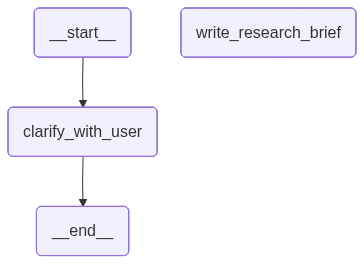

In [9]:
display(Image(scope_research.get_graph(xray=True).draw_mermaid_png()))


To Verify They’re Truly the Same Object

You can run this simple check: If it prints 'True', then both variables refer to the same object in memory.
If it prints: 'False', then they’re separate objects, but their compiled graph structure happens to be identical

In [10]:
print(scope is scope_research)


False
